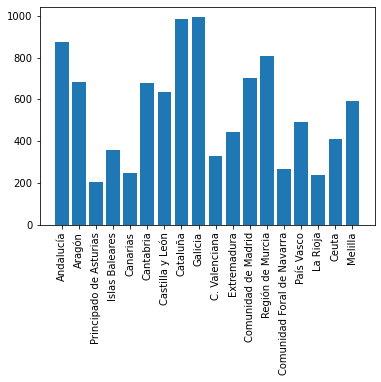

In [1]:
from selenium import webdriver
from lxml import etree
from io import StringIO, BytesIO
import matplotlib.pyplot as plt

# Utilizamos Selenium para obtener el código de la página, pero en este caso la información
# que devolverá incluirá los cambios que se hayan realizado en el DOM tras la ejecución del código
# JavaScript de la página
driver = webdriver.Firefox()
# driver.get("https://covid19.isciii.es/")
driver.get("https://zerjio.com/temp/covid19.html")

html = driver.page_source

# firefox abrira una ventana, si queremos no verla/cerrarla usamos driver.close()
driver.close()

# print(html)

# A partir de aquí el código es muy muy parecido al del segundo notebook

parserHTML = etree.HTMLParser()
tree = etree.parse(StringIO(html), parserHTML)

tablas = tree.xpath('//table') 

tabla = tablas[1]

comunidades = []
casos = []

filas = tabla.xpath('tbody/tr') 

for f in filas:
    comunidades.append(f[0].text)
    casos.append(int(f[1].text))
    
plt.bar(comunidades, casos)
plt.xticks(rotation=90)
plt.show()

In [4]:
# Ejemplo de búsqueda en un formulario. Este ejemplo dejará de funcionar más pronto que tarde en cuanto AliExpress
# actualice su página web.

from selenium import webdriver
import time

driver = webdriver.Firefox()
driver.get("https://es.aliexpress.com/")

# Vamos a hacer una búsqueda dentro de AliExpress con el término: "mascarilla con filtro para virus"
# Podemos buscar los elementos con los que interaccionar. Las búsquedas se pueden hacer por id, name o 
# incluso XPATH: https://selenium-python.readthedocs.io/locating-elements.html

time.sleep(0.5) # No necesario pero para ir viendo poco a poco como se interacciona  

# Primero cerramos el cuadro de publicidad que nos sale
botonCerrarCuadroPublicidad = driver.find_element_by_xpath("//a[@class='close-layer']")
botonCerrarCuadroPublicidad.click()

time.sleep(0.2)

#Buscamos el elemento del formulario de búsqueda (en este caso un <input> con id="search-key").

cuadroTexto = driver.find_element_by_id("search-key")

cuadroTexto.clear()  # Borramos el posible contenido del cuadro de texto
time.sleep(1)
cuadroTexto.send_keys("mascarilla")
time.sleep(1)

botonLupa = driver.find_element_by_xpath("//input[@class='search-button']")
botonLupa.click()



StaleElementReferenceException: Message: The element reference of <a class="close-layer" href="javascript:;"> is stale; either the element is no longer attached to the DOM, it is not in the current frame context, or the document has been refreshed


In [5]:
# Esperar hasta que aparezca un elemento en la página (por ejemplo si sabemos que
# va a crearse con JavaScript después de un tiempo)


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

import time

driver = webdriver.Firefox()
driver.get("https://twitter.com/explore")

# Esperamos un máximo de 10 segundos hasta que aparezca el input deseado
try:
    busquedaTwitter = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//input[@placeholder='Buscar en Twitter']"))
    )
except:
    print("Error al localizar el elemento")
    driver.quit()
    

busquedaTwitter.clear()
busquedaTwitter.send_keys("Kim Jong Un")
busquedaTwitter.send_keys(Keys.RETURN)


In [7]:
# Mover el ratón a una posición determinada (en nuestro caso el enlace a "artículos" de Meneame)

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

driver = webdriver.Firefox()
driver.get("https://meneame.net")

action = ActionChains(driver)

logotipo = driver.find_element_by_xpath("//a[@href='/articles']")
action.move_to_element(logotipo).perform()


In [8]:
# Selenium tiene muchas más posibilidades: maximizar y minimizar ventanas, jugar con las distintas 
# ventanas y pestañas, cuadros de dialogo, cookies, instalar addons, hacer capturas de pantalla, etc, etc

from selenium import webdriver 
import time

driver = webdriver.Firefox()

time.sleep(1)

for ancho in range(400, 1000, 40):
    alto = ancho * 3 / 4
    driver.set_window_size(ancho, alto)
    driver.set_window_position(1000/2 - ancho/2, 800/2 - alto/2)
    time.sleep(.1)

driver.maximize_window()
time.sleep(1)

driver.get("https://selenium-python.readthedocs.io/")

driver.save_screenshot("pantallazo.png")


True